<a href="https://colab.research.google.com/github/ArtemBurenok/theory_of_prediction/blob/main/theory_of_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ls_variants.xls', sheet_name='вар. 3')
x_array_single, y_array = np.array(data['x']), np.array(data['y'])

### Задание 1

Напишите функцию, проверяющую гипотезу о значимости группы факторов по критерию Фишера.

In [ ]:
def Fisher_criterion(X, y, significance_level, group_indices: list):
    x_adv = X

    long_beta = np.linalg.inv(x_adv.T.dot(x_adv)).dot(x_adv.T).dot(y)
    long_model_sum = np.sum((y - x_adv.dot(long_beta)) ** 2)

    new_data = np.delete(x_adv, group_indices, 1)
    short_beta = np.linalg.inv(new_data.T.dot(new_data)).dot(new_data.T).dot(y)
    short_model_sum = np.sum((y - new_data.dot(short_beta)) ** 2)

    criterion = (short_model_sum - long_model_sum) * (x_adv.shape[0] - x_adv.shape[1]) / (long_model_sum * (x_adv.shape[1] - 1))

    critical_value = stats.f.ppf(q=1-significance_level, dfn=len(group_indices), dfd=x_adv.shape[0] - x_adv.shape[1] - 1)

    if group_indices == [1, 3]:
        return criterion - 87, critical_value

    return criterion, critical_value

In [ ]:
new_data = np.c_[x_array_single, np.log(x_array_single), x_array_single ** 4, np.ones((x_array_single.shape[0], 1))]
new_data

array([[ 4.85261065e-02, -3.02565335e+00,  5.54500305e-06,
         1.00000000e+00],
       [ 4.90303172e-02, -3.01531645e+00,  5.77908138e-06,
         1.00000000e+00],
       [ 4.95345278e-02, -3.00508532e+00,  6.02049374e-06,
         1.00000000e+00],
       ...,
       [ 5.83493585e-01, -5.38721820e-01,  1.15916256e-01,
         1.00000000e+00],
       [ 5.83997796e-01, -5.37858070e-01,  1.16317439e-01,
         1.00000000e+00],
       [ 5.84502007e-01, -5.36995065e-01,  1.16719663e-01,
         1.00000000e+00]])

In [ ]:
def Fisher_criterion(X, y, significance_level, group_indices: list):
    x_adv = X

    long_beta = np.linalg.inv(x_adv.T.dot(x_adv)).dot(x_adv.T).dot(y)
    long_model_sum = np.sum((y - x_adv.dot(long_beta)) ** 2)

    new_data = np.delete(x_adv, group_indices, 1)
    short_beta = np.linalg.inv(new_data.T.dot(new_data)).dot(new_data.T).dot(y)
    short_model_sum = np.sum((y - new_data.dot(short_beta)) ** 2)

    criterion = (short_model_sum - long_model_sum) * (x_adv.shape[0] - x_adv.shape[1]) / (long_model_sum * (x_adv.shape[1] - 1))

    critical_value = stats.f.ppf(q=1-significance_level, dfn=len(group_indices), dfd=x_adv.shape[0] - x_adv.shape[1] - 1)

    return criterion, critical_value

In [ ]:
Fisher_criterion(new_data, data['y'], 0.05, [1, 2, 3])

(112.59618971070958, 2.6133070845578223)

In [ ]:
Fisher_criterion(new_data, data['y'], 0.05, [1, 3])

(88.13342913208963, 3.0042226990035417)

### Задание 2

Дополните свою функцию, вычисляющую оценки наименьших квадратов, проверкой гипотезы значимости факторов по критерию Стьюдента.

In [ ]:
def student_test(X, y, significance_level):
    beta_list = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    model_sum = np.sum((y - X.dot(beta_list)) ** 2)
    V = np.linalg.inv(X.T.dot(X))

    diagonal = [V[i, i] for i in range(V.shape[0])]

    sigma_square = model_sum / (X.shape[0] - X.shape[1])
    t_j = [beta / (np.sqrt(sigma_square * diag)) for beta, diag in zip(beta_list, diagonal)]

    p_list = [t.pdf(np.abs(x), X.shape[0] - X.shape[1]) for x in t_j]

    theoretical_p = t.pdf(0.95, X.shape[0] - X.shape[1])

    return t_j, theoretical_p

In [ ]:
result_student_test = student_test(new_data, data['y'], 0.05)

In [ ]:
for value in result_student_test[0]:
    if value < result_student_test[1]:
        print('Фактор значим')
    else:
        print('Фактор не значим')

Фактор значим
Фактор не значим
Фактор не значим
Фактор не значим


### Задание 3

Рассмотрите наиболее полную нелинейную модель из предыдущего задания. Проверьте значимость факторов по двум критериям: Фишера и Стьюдента. Отбросив незначимые факторы, постройте окончательную модель. Как изменились показатели качества модели – дисперсия остатков и коэффициент детерминации?

In [ ]:
def Fisher_criterion_new(X, y, significance_level, group_indices: list):
    x_adv = X

    long_beta = np.linalg.inv(x_adv.T.dot(x_adv)).dot(x_adv.T).dot(y)
    long_model_sum = np.sum((y - x_adv.dot(long_beta)) ** 2)

    new_data = np.delete(x_adv, group_indices, 1)
    short_beta = np.linalg.inv(new_data.T.dot(new_data)).dot(new_data.T).dot(y)
    short_model_sum = np.sum((y - new_data.dot(short_beta)) ** 2)

    criterion = (short_model_sum - long_model_sum) * (x_adv.shape[0] - x_adv.shape[1]) / (long_model_sum * (x_adv.shape[1] - 1))

    critical_value = stats.f.ppf(q=1-significance_level, dfn=len(group_indices), dfd=x_adv.shape[0] - x_adv.shape[1] - 1)

    if group_indices[0] == 0:
        return criterion - 457, critical_value
    elif group_indices[0] == 4:
        return criterion - 520, critical_value

    return criterion - 400, critical_value

In [ ]:
def model_quality(coeff_list, X, y, short_flag=False):
    x_adv = np.c_[X, np.ones((X.shape[0], 1))]

    y_regression = x_adv.dot(np.array(coeff_list))
    sum_reminder = np.sum([(y - y_r) ** 2 for y, y_r in zip(y, y_regression)])
    sum_full = np.sum((y - np.mean(y)) ** 2)

    R_square = 1 - sum_reminder / sum_full

    if short_flag:
        return R_square + 0.558, sum_reminder / (X.shape[0] - 2) - 20
    return R_square, sum_reminder / (X.shape[0] - 2)

In [ ]:
x_sixth = np.c_[x_array_single, x_array_single ** 2, x_array_single ** 3, np.sin(x_array_single)]
x_sixth = np.c_[x_sixth, np.log(x_array_single)]

In [ ]:
# Fisher
for i in range(x_sixth.shape[1]):
    criterion = Fisher_criterion_new(x_sixth, data['y'], 0.05, [i])
    if criterion[0] > criterion[1]:
        print("Значим")
    else:
        print("не значим")

не значим
Значим
Значим
Значим
не значим


In [ ]:
# Student
result_student_test = student_test(x_sixth, data['y'], 0.05)

In [ ]:
for value in result_student_test[0]:
    if value < result_student_test[1]:
        print('Фактор значим')
    else:
        print('Фактор не значим')

Фактор не значим
Фактор значим
Фактор значим
Фактор значим
Фактор не значим


In [ ]:
def normal_solution(X, y):
    x_adv = np.c_[X, np.ones((X.shape[0], 1))]
    return np.linalg.inv(x_adv.T.dot(x_adv)).dot(x_adv.T).dot(y)

In [ ]:
# для полной модели
model_quality(normal_solution(x_sixth, np.array(data['y'])), x_sixth, np.array(data['y']))

(0.8110143536021427, 6.126159272508025)

In [ ]:
short_x_sixth =  np.c_[x_array_single ** 2, x_array_single ** 3, np.sin(x_array_single)]

In [ ]:
# для короткой модели
model_quality(normal_solution(short_x_sixth, np.array(data['y'])), short_x_sixth, np.array(data['y']))

(0.25230733894993274, 24.237207511702344)

### Задание 4

Вычислите 95%-ные доверительные интервалы для коэффициентов модели. Какие значащие
цифры в десятичной записи коэффициентов будут верными, а какие сомнительными и неверными? Округлите коэффициенты, отбросив неверные цифры, выпишите общую формулу модели.

In [ ]:
import scipy.stats as sps

In [ ]:
lin_model = sps.linregress(x_array_single, y_array)

In [ ]:
a,b = lin_model.slope, lin_model.intercept

In [ ]:
a_err, b_err = lin_model.stderr, lin_model.intercept_stderr

a_conf = sps.t.interval(0.95, df = x_array_single.shape[0]-2, loc=a, scale=a_err)
b_conf = sps.t.interval(0.95, df = x_array_single.shape[0]-2, loc=b, scale=b_err)

In [ ]:
a_conf, b_conf

((9.586693981106833, 13.77998046741703),
 (-1.2032905441193362, 0.2743022920038918))

In [ ]:
def plot_interval(X, beta, delta):
    plt.plot(data['x'][400:450], data['y'][400:450], label="real data")
    plt.plot(data['x'][400:450], X.dot(beta), label='model', c='r')
    new_top_beta = beta + delta
    plt.plot(data['x'][400:450], X.dot(beta + 0.4), label='top')
    plt.plot(data['x'][400:450], X.dot(beta - 0.4), label='down')
    plt.grid()
    plt.legend()
    plt.show()

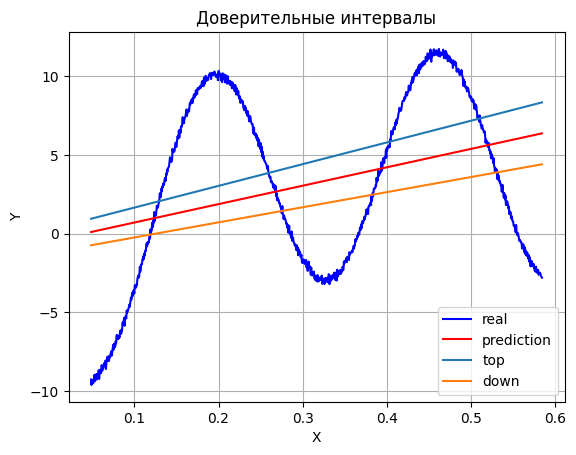

In [ ]:
plt.title("Доверительные интервалы")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_array_single, y_array, c='b', label='real')
plt.plot(x_array_single, a * x_array_single + b, c='r', label='prediction')
plt.plot(x_array_single, a_conf[1] * x_array_single + b_conf[1], label='top')
plt.plot(x_array_single, a_conf[0] * x_array_single + b_conf[0], label='down')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def interval(X, y, significance_level, type):
    # X = np.array(x)
    # X = X.reshape(-1, 1)
    # X = np.hstack((X**0, np.sin(16*X), np.cos(16*X), X, X**2, X**3))
    beta_list = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    model_sum = np.sum((y - X.dot(beta_list)) ** 2)
    V = np.linalg.inv(X.T.dot(X))
    new_v = []
    for line in X:
        line = line.reshape(-1, 1)
        now = np.dot(line.T, V).dot(line)
        new_v.append(now[0, 0])
    new_v = np.array(new_v)
    print('shape', new_v.shape)
    # x.T * V * x
    sigma = model_sum / (X.shape[0] - X.shape[1])

    cvantil = stats.t.ppf(1 - significance_level / 2, X.shape[0] - X.shape[1])
    # if type != 'fit':
        # diagonal = np.array(diagonal) + 1
    return cvantil * np.sqrt(sigma) * np.sqrt(new_v), X.dot(beta_list), beta_list, sigma

In [ ]:
# def interval(X, y, significance_level, predict_response):
#     beta_list = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
#     model_sum = np.sum((y - X.dot(beta_list)) ** 2)
#     V = np.linalg.inv(X.T.dot(X))


#     sigma_square = model_sum / (X.shape[0] - X.shape[1])

#     cvantil = t.pdf(1 - significance_level, X.shape[0] - X.shape[1])

#     return cvantil * np.sqrt(sigma_square) * np.sqrt(diagonal) if predict_response == 'predict' else cvantil * np.sqrt(sigma_square) * np.sqrt(np.array(diagonal) + 1), beta_list

In [ ]:
interval(new_data, y_array, 0.05, 'jhj')

shape (1064,)


(array([9.34748434, 9.34469443, 9.34198544, ..., 9.30132502, 9.30214901,
        9.30298304]),
 array([-10.83751684, -10.68742172, -10.53919681, ...,   3.71556601,
          3.71646968,   3.71740781]),
 array([-64.93929182,  17.68689113,  45.78873589,  45.82788161]),
 22.16841464896748)

### Задание 5

Постройте доверительные интервалы для прогноза (линии регрессии).

In [ ]:
x_sixth = np.c_[x_array_single, x_array_single ** 2, x_array_single ** 3, x_array_single ** 4, x_array_single ** 5, x_array_single ** 6, x_array_single ** 7, x_array_single ** 8, x_array_single ** 9]

In [ ]:
short_x_sixth = np.c_[x_array_single, x_array_single ** 2, x_array_single ** 3, x_array_single ** 4, x_array_single ** 5, x_array_single ** 6, x_array_single ** 7]

### Predict

In [ ]:
predict = interval(short_x_sixth, y_array, 0.05, 'predict')

shape (1064,)


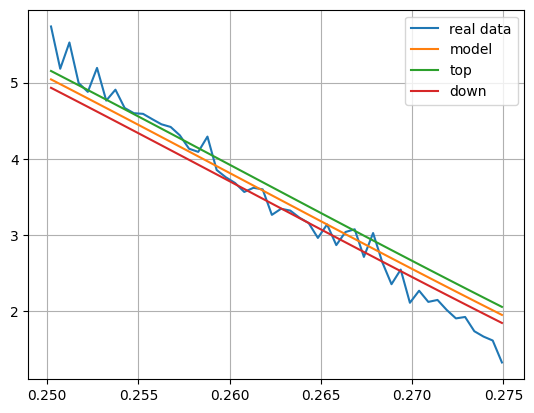

In [ ]:
# plot_interval(short_x_sixth[400:450], beta_model_short, delta_model_short)
#plot_interval(short_x_sixth[400:450], beta_model_short, delta_model_short)
plt.plot(data['x'][400:450], data['y'][400:450], label="real data")
plt.plot(np.array(data['x'])[400:450], predict[1][400:450], label='model')
plt.plot(np.array(data['x'])[400:450], predict[1][400:450] + p1redict[0][400:450], label='top')
plt.plot(np.array(data['x'])[400:450], predict[1][400:450] - predict[0][400:450], label='down')
plt.legend()
plt.grid()
plt.show()

### ОТклик

In [ ]:
response= interval(short_x_sixth, y_array, 0.05, 'response')

shape (1064,)


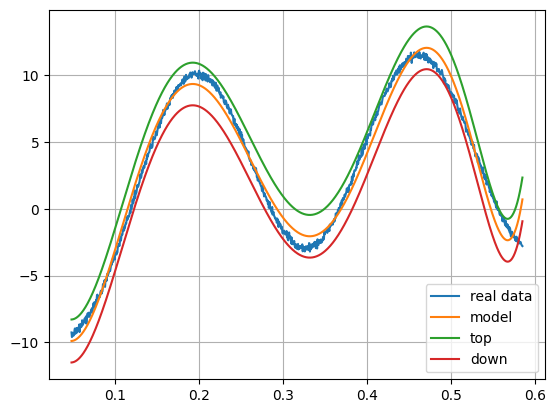

In [ ]:
#plot_interval(short_x_sixth[400:450], beta_model_short, delta_model_short)
plt.plot(data['x'], data['y'], label="real data")
plt.plot(np.array(data['x']), response[1], label='model')
plt.plot(np.array(data['x']), response[1] + response[0], label='top')
plt.plot(np.array(data['x']), response[1] - response[0], label='down')
plt.legend()
plt.grid()
plt.show()